In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('dark_background')


In [2]:
listings = pd.read_csv("../../cleaned/listings.csv")
calendar_summary = pd.read_csv("../../cleaned/calendar_summary.csv")
#legacy (local) directories not available on repo - wrangled/cleaned data uploaded to ivanachille.com/publicdata/Airbnb-Berlin-Analytics

In [3]:
listings

,listing_id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,instant_bookable,is_business_travel_ready,require_guest_phone_verification,require_guest_profile_picture
0,2015,2217,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,3.76,4,141,f,f,f,f
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,1.42,1,0,f,f,f,f
2,3176,3718,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,1.25,1,220,t,f,f,f
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,0.39,1,297,f,f,f,f
4,7071,17391,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,1.75,1,26,f,f,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,29856708,87555909,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,1,314,f,f,f,f
22540,29857108,67537363,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,6,78,t,f,f,f
22541,29864272,3146923,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,2,15,f,f,f,f
22542,29866805,36961901,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,3,6,f,f,f,f


In [199]:
listings.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_spending
count,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,18632.000000,22544.000000,22544.000000,2.254400e+04
mean,1.571397e+07,5.403447e+07,52.509827,13.406098,67.167495,7.158801,17.842353,1.135479,1.917406,79.849805,5.132126e+02
std,8.553137e+06,5.816826e+07,0.030824,0.057964,220.301658,40.672178,36.773492,1.506986,3.666474,119.366279,1.050367e+04
min,2.015000e+03,2.217000e+03,52.345803,13.103557,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000e+00
25%,8.064893e+06,9.236839e+06,52.489064,13.375409,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000,6.000000e+01
50%,1.686508e+07,3.126319e+07,52.509075,13.416777,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000,1.200000e+02
75%,2.258712e+07,8.065435e+07,52.532670,13.439251,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000,2.580000e+02
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000,1.275000e+06


(array([2.2451e+04, 5.1000e+01, 7.0000e+00, 1.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.00000e+00, 4.50950e+02, 9.00900e+02, 1.35085e+03, 1.80080e+03,
        2.25075e+03, 2.70070e+03, 3.15065e+03, 3.60060e+03, 4.05055e+03,
        4.50050e+03, 4.95045e+03, 5.40040e+03, 5.85035e+03, 6.30030e+03,
        6.75025e+03, 7.20020e+03, 7.65015e+03, 8.10010e+03, 8.55005e+03,
        9.00000e+03]),
 <a list of 20 Patch objects>)

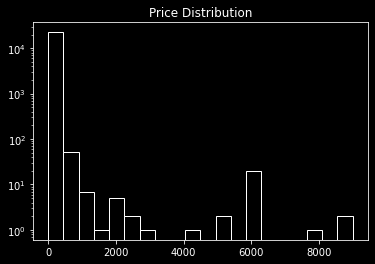

In [4]:
pricedata = listings['price']
plt.title("Price Distribution")
plt.hist(pricedata, color="black", bins=20, log=0.01, edgecolor="white")

In [5]:
pricedata.describe()

count    22544.000000
mean        67.167495
std        220.301658
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [6]:
listings["require_guest_profile_picture"].value_counts()

f    22388
t      156
Name: require_guest_profile_picture, dtype: int64

In [7]:
a = listings["room_type"].value_counts()
roomtypes_prop = np.array([a[0],a[1],a[2]])
print(a)
roomtypes_prop

Private room       11529
Entire home/apt    10719
Shared room          296
Name: room_type, dtype: int64


array([11529, 10719,   296])

<BarContainer object of 3 artists>

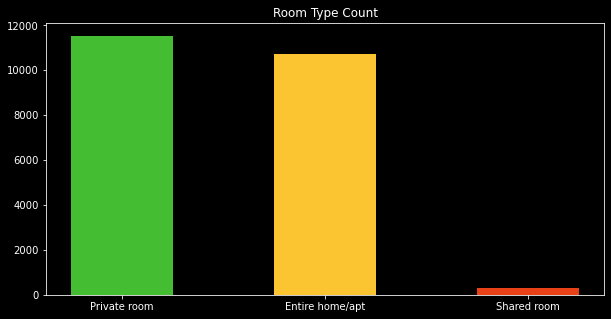

In [185]:
plt.figure(figsize=(10,5))
plt.title("Room Type Count")
plt.bar(["Private room", "Entire home/apt", "Shared room"],roomtypes_prop, color=['#44bd32','#fbc531','#e84118'], width=0.5)

In [9]:
listings["minimum_nights"].describe()

count    22544.000000
mean         7.158801
std         40.672178
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [10]:
listings["minimum_nights"].describe()

count    22544.000000
mean         7.158801
std         40.672178
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [11]:
listings.groupby(listings["room_type"]).mean()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.480889e+07,4.950696e+07,52.511071,13.404700,83.372236,10.453214,19.239854,1.102702,2.154865,92.065864
Private room,1.650580e+07,5.780534e+07,52.508518,13.407519,52.501865,4.183624,16.570908,1.159858,1.547055,67.622430
Shared room,1.764845e+07,7.111596e+07,52.515741,13.401349,51.564189,3.739865,16.756757,1.397626,7.743243,113.719595


In [187]:
listings.groupby(listings["room_type"])["minimum_nights"].mean()

room_type
Entire home/apt    10.453214
Private room        4.183624
Shared room         3.739865
Name: minimum_nights, dtype: float64

In [188]:
listings["room_type"].value_counts().index

Index(['Private room', 'Entire home/apt', 'Shared room'], dtype='object')

<BarContainer object of 3 artists>

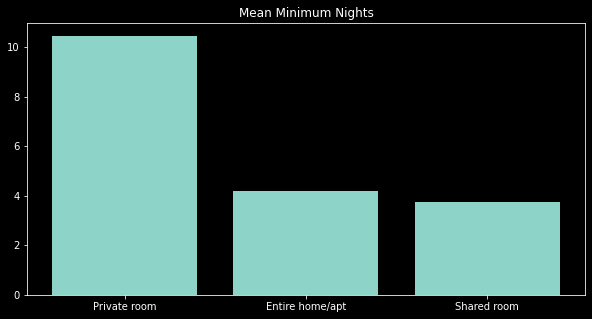

In [190]:
plt.figure(figsize=(10,5))
plt.title("Mean Minimum Nights")
plt.bar(listings["room_type"].value_counts().index,listings.groupby(listings["room_type"])["minimum_nights"].mean())

In [15]:
listings["min_spending"] = listings["minimum_nights"]*listings["price"]
#creation of minimum spending variable, important because this is the "true price" of renting that location

In [204]:
listings["price"].mean()
#average price p/night

67.16749467707594

In [205]:
listings["min_spending"].mean()
#means that on average, the minimum spending of a reservation is $120

513.2126064584812

In [206]:
print("MEAN PRICE PER NIGHT G/BY ROOMTYPE")
print(listings["price"].groupby(listings["room_type"]).mean())

MEAN PRICE PER NIGHT G/BY ROOMTYPE
room_type
Entire home/apt    83.372236
Private room       52.501865
Shared room        51.564189
Name: price, dtype: float64


In [207]:
print("MEAN MIN. SPENDING PER NIGHT G/BY ROOMTYPE")
print(listings["min_spending"].groupby(listings["room_type"]).mean())

MEAN MIN. SPENDING PER NIGHT G/BY ROOMTYPE
room_type
Entire home/apt    889.984513
Private room       171.627027
Shared room        173.760135
Name: min_spending, dtype: float64


In [208]:
roomtypes_medms_sorted = listings["min_spending"].groupby(listings["room_type"]).mean().index

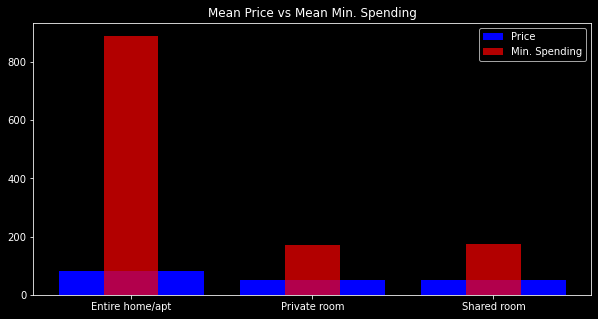

In [209]:
plt.figure(figsize=(10,5))
plt.title("Mean Price vs Mean Min. Spending")
plt.bar(roomtypes_medms_sorted,listings["price"].groupby(listings["room_type"]).mean(), label="Price", alpha=1, color="blue")
plt.bar(roomtypes_medms_sorted,listings["min_spending"].groupby(listings["room_type"]).mean(), width=0.3, label="Min. Spending", alpha=0.7, color="red")
plt.legend()

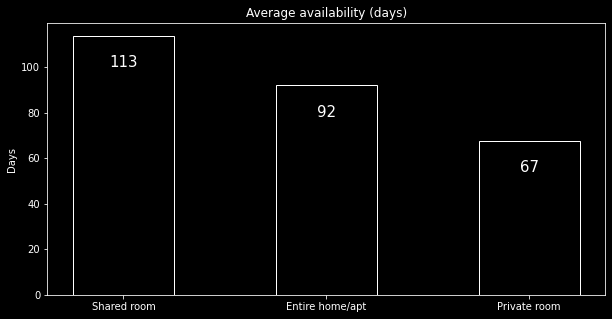

In [196]:
plt.figure(figsize=(10,5))
plt.title("Average availability (days)")
plt.ylabel("Days")
plt.bar(listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False).index,
        listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False), 
        color="black", edgecolor="white", width=0.5,
       )

it = np.array(listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False))
for i in range(3):
    plt.annotate(int(it[i]),(i,it[i]-15), ha='center', va='bottom', color="white", fontsize="15")


In [23]:
listings["neighbourhood_group"].value_counts()

Friedrichshain-Kreuzberg    5493
Mitte                       4630
Pankow                      3540
Neukölln                    3499
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1559
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        140
Spandau                      124
Name: neighbourhood_group, dtype: int64

In [24]:
price_per_district = listings["price"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
price_per_district

neighbourhood_group
Charlottenburg-Wilm.        114.270729
Tempelhof - Schöneberg       96.634381
Mitte                        69.714471
Pankow                       67.841808
Friedrichshain-Kreuzberg     60.873111
Spandau                      58.233871
Marzahn - Hellersdorf        56.907143
Steglitz - Zehlendorf        56.327231
Lichtenberg                  56.113372
Treptow - Köpenick           52.216807
Reinickendorf                48.263158
Neukölln                     46.567305
Name: price, dtype: float64

<BarContainer object of 3 artists>

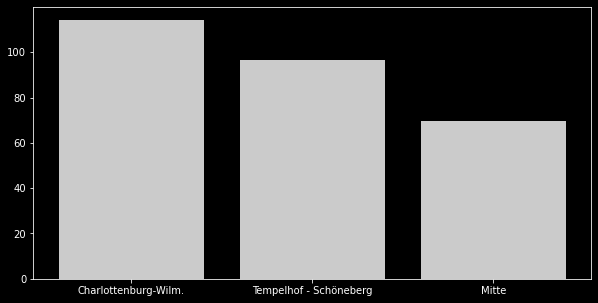

In [215]:
plt.figure(figsize=(10,5))
plt.bar(["Charlottenburg-Wilm.","Tempelhof - Schöneberg","Mitte"], [114.27,96.63,69.71], color="white", alpha=0.8)

The data tells us that Charlottenburg is the most expensive district in Berlin (for renting specifically in this dataset, but when rent prices are high, everything tends to be expensive) which we can confirm with a quick google research <b>"The Charlottenburg district is the wealthiest and most commercialized in western Berlin" <i>from frommers.com</i></b>

In [25]:
min_spending_per_district = listings["min_spending"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
min_spending_per_district

neighbourhood_group
Charlottenburg-Wilm.        1214.725503
Mitte                        807.045572
Spandau                      490.258065
Marzahn - Hellersdorf        476.028571
Pankow                       448.803107
Tempelhof - Schöneberg       415.806928
Reinickendorf                400.153846
Friedrichshain-Kreuzberg     368.492081
Lichtenberg                  349.707849
Steglitz - Zehlendorf        332.270023
Treptow - Köpenick           269.852101
Neukölln                     247.393827
Name: min_spending, dtype: float64

<BarContainer object of 3 artists>

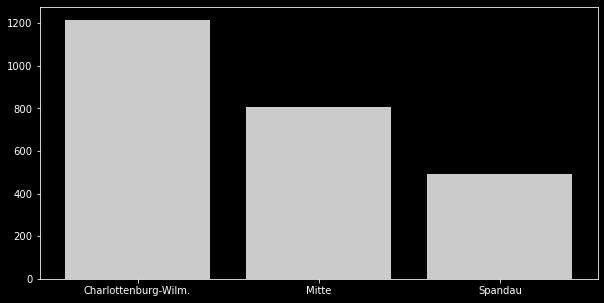

In [216]:
plt.figure(figsize=(10,5))
plt.bar(["Charlottenburg-Wilm.","Mitte","Spandau"], [1214.72,807.04,490.25], color="white", alpha=0.8)

After checking the <b>mean minimum spending</b> compared to the <b>mean price</b>, we can see that, on average, though some districts rent prices are higher, others surpasses these in total renting cost because of the min. required nights

In [26]:
availability_per_district = listings["availability_365"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
availability_per_district

neighbourhood_group
Spandau                     195.564516
Marzahn - Hellersdorf       177.528571
Steglitz - Zehlendorf       125.457666
Charlottenburg-Wilm.        118.331030
Reinickendorf               117.935223
Tempelhof - Schöneberg       93.076331
Treptow - Köpenick           90.825210
Mitte                        85.147516
Pankow                       81.032203
Lichtenberg                  74.129360
Friedrichshain-Kreuzberg     66.505006
Neukölln                     52.056302
Name: availability_365, dtype: float64

Mean availability (days) grouped by district

In [27]:
rt_dummies = pd.get_dummies(listings["room_type"])
rt_dummies

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
22539,1,0,0
22540,0,0,1
22541,1,0,0
22542,0,1,0


In [28]:
rt_dt = rt_dummies.groupby(listings["neighbourhood_group"]).sum()

In [29]:
rt_dt = rt_dt.reset_index()

In [30]:
print("(x%) of total listings")
print((listings["room_type"].value_counts())/len(listings)*100)

(x%) of total listings
Private room       51.139993
Entire home/apt    47.547019
Shared room         1.312988
Name: room_type, dtype: float64


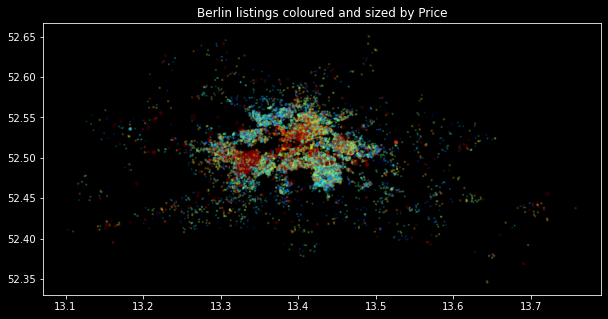

In [198]:
plt.figure(figsize=(10,5))
plt.title("Berlin listings coloured and sized by Price")
plt.scatter(listings["longitude"],listings["latitude"], c=listings["price"],cmap="jet", alpha=0.2,
           s=listings["price"]/30,vmin=1,vmax=100)

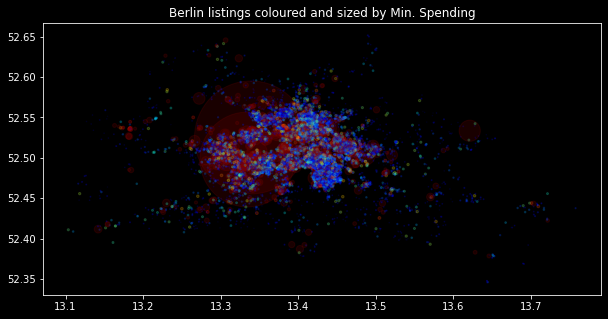

In [32]:
plt.figure(figsize=(10,5))
plt.title("Berlin listings coloured and sized by Min. Spending")
plt.scatter(listings["longitude"],listings["latitude"], c=listings["min_spending"],cmap="jet", alpha=0.2,
           s=listings["min_spending"]/100,vmin=1,vmax=1000)

(x%) instant bookable
f    68.798793
t    31.201207
Name: instant_bookable, dtype: float64


<BarContainer object of 2 artists>

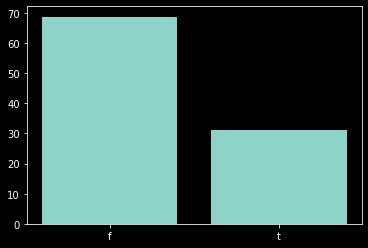

In [33]:
print("(x%) instant bookable")
print((listings["instant_bookable"].value_counts())/len(listings)*100)
plt.bar(["f","t"],(listings["instant_bookable"].value_counts())/len(listings)*100)

In [34]:
print("(x%) business travel ready")
print((listings["is_business_travel_ready"].value_counts())/len(listings)*100)

(x%) business travel ready
f    100.0
Name: is_business_travel_ready, dtype: float64


In [35]:
print("(x%) require guest phone verif")
print((listings["require_guest_phone_verification"].value_counts())/len(listings)*100)

(x%) require guest phone verif
f    98.76242
t     1.23758
Name: require_guest_phone_verification, dtype: float64


In [36]:
print("(x%) require guest profile pic")
print((listings["require_guest_profile_picture"].value_counts())/len(listings)*100)

(x%) require guest profile pic
f    99.30802
t     0.69198
Name: require_guest_profile_picture, dtype: float64


99.3% required guest profile pic: possible biased <b>discrimination behaviour?</b>

In [37]:
calendar_summary

,listing_id,date,available
0,2015,2019-09-10,f
1,2015,2019-09-09,f
2,2015,2019-09-08,f
3,2015,2019-09-07,f
4,2015,2019-09-06,f
...,...,...,...
8231475,29809357,2018-11-11,f
8231476,29809357,2018-11-10,f
8231477,29809357,2018-11-09,f
8231478,29809357,2018-11-08,f


In [38]:
calendar_summary.head(10)

,listing_id,date,available
0,2015,2019-09-10,f
1,2015,2019-09-09,f
2,2015,2019-09-08,f
3,2015,2019-09-07,f
4,2015,2019-09-06,f
5,2015,2019-09-05,f
6,2015,2019-09-04,f
7,2015,2019-09-03,f
8,2015,2019-09-02,f
9,2015,2019-09-01,f


In [39]:
calendar_summary["listing_id"].value_counts().count()
#22552 unique listings on calendar summary > 22544 unique listings on listings dataframe

22552

In [40]:
import datetime

In [41]:
calendar_summary["date_datetime"] = pd.to_datetime(calendar_summary["date"], format='%Y-%m-%d')
#create date column with datetime format in order to be able to perform operations with the dates

In [42]:
calendar_summary

,listing_id,date,available,date_datetime
0,2015,2019-09-10,f,2019-09-10
1,2015,2019-09-09,f,2019-09-09
2,2015,2019-09-08,f,2019-09-08
3,2015,2019-09-07,f,2019-09-07
4,2015,2019-09-06,f,2019-09-06
...,...,...,...,...
8231475,29809357,2018-11-11,f,2018-11-11
8231476,29809357,2018-11-10,f,2018-11-10
8231477,29809357,2018-11-09,f,2018-11-09
8231478,29809357,2018-11-08,f,2018-11-08


In [43]:
calendar_summary = calendar_summary.drop("date", axis=1)

In [44]:
calendar_summary

,listing_id,available,date_datetime
0,2015,f,2019-09-10
1,2015,f,2019-09-09
2,2015,f,2019-09-08
3,2015,f,2019-09-07
4,2015,f,2019-09-06
...,...,...,...
8231475,29809357,f,2018-11-11
8231476,29809357,f,2018-11-10
8231477,29809357,f,2018-11-09
8231478,29809357,f,2018-11-08


In [45]:
calendar_summary["date_datetime"][0]-calendar_summary["date_datetime"][8231479]

Timedelta('307 days 00:00:00')

In [46]:
calendar_summary["date_datetime"].dt.month

0           9
1           9
2           9
3           9
4           9
           ..
8231475    11
8231476    11
8231477    11
8231478    11
8231479    11
Name: date_datetime, Length: 8231480, dtype: int64

In [47]:
calendar_summary['month'] = calendar_summary['date_datetime'].dt.month

In [48]:
calendar_summary['year'] = calendar_summary['date_datetime'].dt.year

In [49]:
calendar_summary = calendar_summary.sort_values(by="date_datetime",ascending=False)

In [55]:
calendar_summary = calendar_summary.reset_index()
calendar_summary = calendar_summary.drop("index", axis=1)

In [56]:
calendar_summary

,listing_id,available,date_datetime,month,year
0,14831972,t,2019-11-08,11,2019
1,5798346,f,2019-11-08,11,2019
2,18836877,f,2019-11-08,11,2019
3,14831972,t,2019-11-07,11,2019
4,5798346,f,2019-11-07,11,2019
...,...,...,...,...,...
8231475,17221202,f,2018-11-07,11,2018
8231476,2541994,t,2018-11-07,11,2018
8231477,22646454,f,2018-11-07,11,2018
8231478,22699927,f,2018-11-07,11,2018


In [57]:
calendar_summary["date_datetime"][0]-calendar_summary["date_datetime"][8231479]

Timedelta('366 days 00:00:00')

In [61]:
cs2019 = calendar_summary.loc[calendar_summary["year"]==2019]

In [62]:
cs2019

,listing_id,available,date_datetime,month,year
0,14831972,t,2019-11-08,11,2019
1,5798346,f,2019-11-08,11,2019
2,18836877,f,2019-11-08,11,2019
3,14831972,t,2019-11-07,11,2019
4,5798346,f,2019-11-07,11,2019
...,...,...,...,...,...
6991121,19763101,f,2019-01-01,1,2019
6991122,21092563,f,2019-01-01,1,2019
6991123,17841139,f,2019-01-01,1,2019
6991124,11765418,f,2019-01-01,1,2019


In [80]:
cs2019.loc[cs2019["month"]==1]["listing_id"].value_counts().value_counts()

31    22552
Name: listing_id, dtype: int64

In [82]:
cs2019.loc[cs2019["month"]==1]["available"].value_counts()

f    503074
t    196038
Name: available, dtype: int64

In [83]:
cs2019.loc[cs2019["month"]==1]["available"].value_counts().sum()

699112

In [84]:
22552*31

699112

In [98]:
te = cs2019["available"].groupby(cs2019["month"]).value_counts()

In [100]:
te

month  available
1      f            503074
       t            196038
2      f            477362
       t            154094
3      f            529743
       t            169369
4      f            506749
       t            169811
5      f            553373
       t            145739
6      f            542413
       t            134147
7      f            554795
       t            144317
8      f            556334
       t            142778
9      f            535612
       t            140948
10     f            550439
       t            148673
11     f            106319
       t             28999
Name: available, dtype: int64

In [111]:
true_av = []
for i in range(12):
    if i==0:
        pass
    else:
        s = te[i][1]
        true_av.append(s)

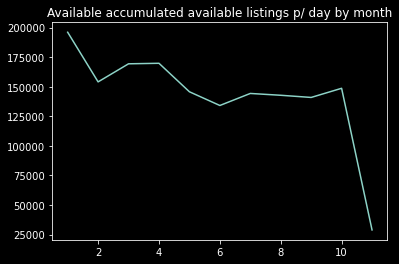

In [144]:
plt.title("Available accumulated available listings p/ day by month")
plt.plot([1,2,3,4,5,6,7,8,9,10,11],true_av)

<BarContainer object of 11 artists>

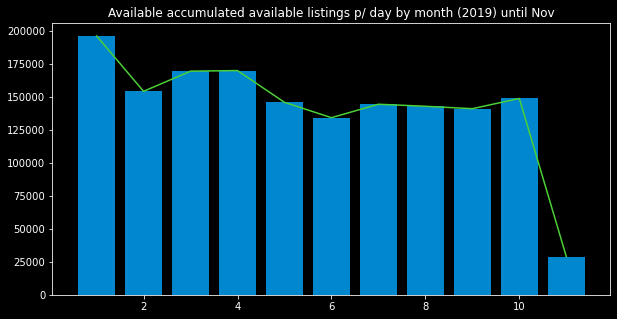

In [221]:
plt.figure(figsize=(10,5))
plt.title("Available accumulated available listings p/ day by month (2019) until Nov")
plt.plot([1,2,3,4,5,6,7,8,9,10,11],true_av, color="#4cd137")
plt.bar([1,2,3,4,5,6,7,8,9,10,11],true_av, alpha=0.9, color="#0097e6")

The data of 2019 stops at November, so that's why the graph stops at Nov. too. Anyways, my hypothesis is that December may be even a busiest month than november because of Christmas and New Year. For experementing purposes only, I'll compare the 2018 data of Nov vs Dec. to have an approximate idea of what Dec. may have looked like in 2019.

In [156]:
cs2018 = calendar_summary.loc[calendar_summary["year"]==2018]
cs2018
#note: the data fails to measure the days from 0 to 6 of nov

,listing_id,available,date_datetime,month,year
6991126,986324,f,2018-12-31,12,2018
6991127,25477258,f,2018-12-31,12,2018
6991128,27712888,f,2018-12-31,12,2018
6991129,15459784,f,2018-12-31,12,2018
6991130,768330,f,2018-12-31,12,2018
...,...,...,...,...,...
8231475,17221202,f,2018-11-07,11,2018
8231476,2541994,t,2018-11-07,11,2018
8231477,22646454,f,2018-11-07,11,2018
8231478,22699927,f,2018-11-07,11,2018


In [161]:
cs2018.loc[cs2018["month"]==11]["available"].value_counts().sum()

541242

In [160]:
cs2018.loc[cs2018["month"]==12]["available"].value_counts().sum()

699112

In [162]:
cs2018.loc[cs2018["month"]==11]["available"].value_counts()

f    456325
t     84917
Name: available, dtype: int64

In [163]:
cs2018.loc[cs2018["month"]==12]["available"].value_counts()

f    558101
t    141011
Name: available, dtype: int64

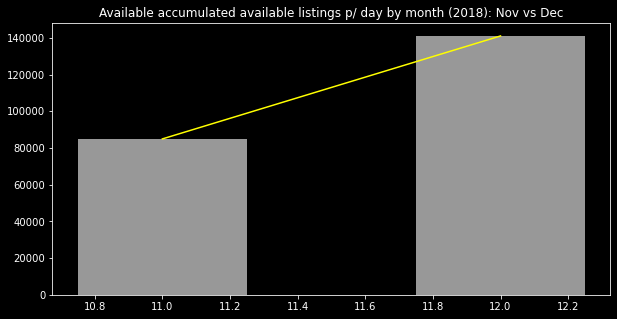

In [180]:
plt.figure(figsize=(10,5))
plt.title("Available accumulated available listings p/ day by month (2018): Nov vs Dec")
plt.bar([11,12],[84917,141011], width=0.5, alpha=0.6, color="white")
plt.plot([11,12],[84917,141011], color="yellow")

Contrary to what I believed, december seems to be a less busy month than november. Anyways, there are some skews in the 2018 listings calendar data such as the amount of days each month counts and the amount of listings between both months; so I wouldn't jump into a 100% accurate conclusion. Nonetheless, it would be coherent and factible that december could be a less busy month.

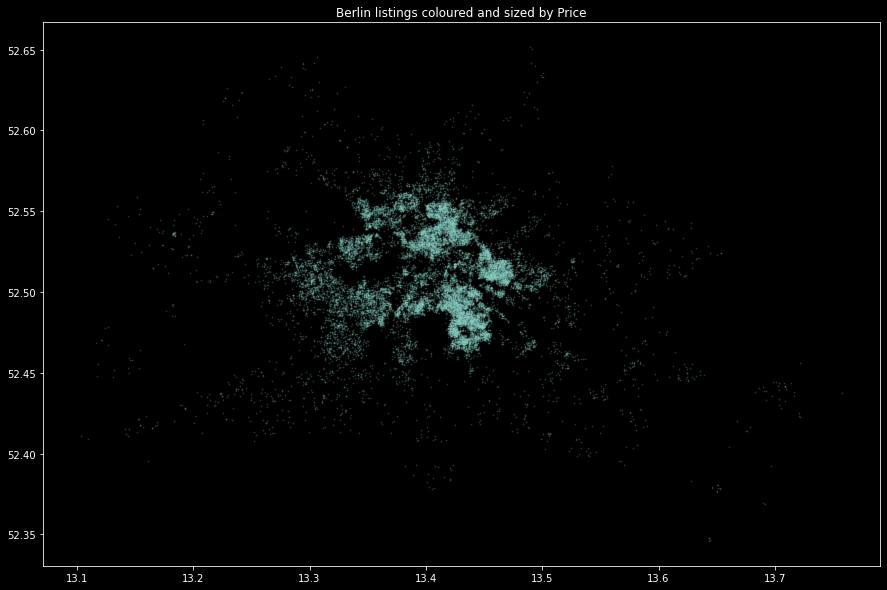

In [183]:
plt.figure(figsize=(15,10))
plt.title("Berlin listings coloured and sized by Price")
plt.scatter(listings["longitude"],listings["latitude"],alpha=0.2,
           s=0.6,vmin=1,vmax=100)

In [87]:
cs2019.loc[cs2019["month"]==3]["available"].value_counts()

f    529743
t    169369
Name: available, dtype: int64